<a href="https://colab.research.google.com/github/narenderkulariya/st20269341-CMP7005-PRAC1/blob/main/st20269341_CMP7005_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality Data in India (2015 - 2020)**


# Table of Contents ➡

**(1) Introduction:**

* Context & Motivation

* Dataset Overview (26 Cities, 2015–2020)

* Objectives

**(2) Data Handling & Inspection:**

* Importing Libraries & Loading Data

* Initial Inspection (Structure, Shape, Data Types)

* Missing Value Analysis (Identification &   Visualization)

**(3) Data Cleaning & Preprocessing:**

* Handling Missing Values (City-wise Imputation)

* Date Parsing & Feature Engineering

* Verification: Confirming Zero Missing Values

**(4) Exploratory Data Analysis (EDA):**

* Trend & Time-Series Analysis: Yearly trends, Seasonality, and COVID-19 Impact.

* Geographical & Comparative Analysis: Most polluted cities and Regional disparities.

* Pollutant Composition: Correlation analysis and Drivers of AQI (PM2.5/PM10).

* Categorical Analysis: AQI Bucket frequency (Severe vs. Good days).


**(6) Conclusion:**

# **(1) Introduction**

**Context:**
Air pollution is a major health problem in India.
Because cities and industries are growing fast, the air in many Indian cities has become very dirty and often reaches dangerous levels for people’s health.

**Dataset overview:**
The project uses air quality data from 26 big Indian cities, collected over five years (2015–2020).
The dataset has daily values of important pollutants like PM2.5, PM10, NO2, SO2, CO, O3 and also the overall Air Quality Index (AQI).

**Objectives:**
The main aim is to turn messy raw air quality data into clear and useful information.
This is done by:

**Data cleaning:** Fixing missing and incomplete values using smart methods so the data becomes continuous and trustworthy.

**Exploratory analysis:** Finding patterns such as winter pollution peaks ("winter smog"), differences between North and South India, and the effect of special events like the COVID-19 lockdown.

**Insight generation:** Understanding which pollutants are most harmful and which cities or regions need urgent action from policymakers and authorities.

## **Importing the required libraries**⏩

In [2]:
import numpy as np                    # Importing NumPy for numerical and array operations
import matplotlib.pyplot as plt       # Importing Matplotlib's pyplot for plotting graphs
import pandas as pd                   # Importing pandas for data manipulation and analysis
import os                             # Importing os to interact with the operating system (paths, directories, etc.)
import glob                           # Importing glob to find pathnames matching a specified pattern
import seaborn as sns                 # Importing Seaborn for statistical data visualization (built on top of Matplotlib)
from sklearn import preprocessing     # Importing preprocessing module from scikit-learn for data scaling, encoding, etc.
import warnings                       # Importing warnings module to manage warning messages
warnings.filterwarnings('ignore')     # Telling here to Python to ignore all warning messages in the output
import plotly.express as px           # Importing Plotly Express for easy interactive visualizations
import plotly.graph_objects as go     # Importing Plotly Graph Objects for more customizable interactive plots


## **Mounting the drive**

In [3]:
# Loading the Drive helper and mounting the drive
from google.colab import drive

# using prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/pds asset data set'
# locating the data path

/content/drive/MyDrive/pds asset data set


In [5]:
%ls # it helps to show all the content of folder

Ahmedabad_data.csv               Gurugram_data.csv
Aizawl_data.csv                  Guwahati_data.csv
all_cities_combined_cleaned.csv  Hyderabad_data.csv
all_cities_combined.csv          Jaipur_data.csv
Amaravati_data.csv               Jorapokhar_data.csv
Amritsar_data.csv                Kochi_data.csv
Bengaluru_data.csv               Kolkata_data.csv
Bhopal_data.csv                  Lucknow_data.csv
Brajrajnagar_data.csv            Mumbai_data.csv
Chandigarh_data.csv              Patna_data.csv
Chennai_data.csv                 Shillong_data.csv
Coimbatore_data.csv              Talcher_data.csv
Delhi_data.csv                   Thiruvananthapuram_data.csv
Ernakulam_data.csv               Visakhapatnam_data.csv


In [6]:
# The pattern "*_data.csv" means "find all files that end with '_data.csv'"
# This will find files like: Ahmedabad_data.csv, Delhi_data.csv, etc.

city_files = glob.glob("*_data.csv")

# Creating an empty list to store all our city data
# We'll put each city's data in this list before combining them
all_cities_data = []

# Reading each city file one by one
for file_name in city_files:
    # Read the current city's CSV file into a DataFrame
    city_df = pd.read_csv(file_name)

    # Adding this city's data to our list
    all_cities_data.append(city_df)

    # Printing which file we just read
    print(f"Loaded: {file_name}")

# Combinning all city data into one big table

# here pd.concat() joins all the DataFrames in our list together
# ignore_index=True makes sure the row numbers are continuous (0, 1, 2, 3...)
combined_data = pd.concat(all_cities_data, ignore_index=True)

# Saving the combined data to a new CSV file
# here index=False means don't save the row numbers as a separate column
combined_data.to_csv("all_cities_combined.csv", index=False)

# Showing us what we accomplished
# len(city_files) = count of how many city files we combined
# len(combined_data) = total number of rows in the final combined file
print(f"SUCCESS: Combined {len(city_files)} city files into one file with {len(combined_data)} total rows")
print("The combined file is saved as: all_cities_combined.csv")

Loaded: Ahmedabad_data.csv
Loaded: Amritsar_data.csv
Loaded: Mumbai_data.csv
Loaded: Kochi_data.csv
Loaded: Kolkata_data.csv
Loaded: Bengaluru_data.csv
Loaded: Patna_data.csv
Loaded: Guwahati_data.csv
Loaded: Hyderabad_data.csv
Loaded: Ernakulam_data.csv
Loaded: Chennai_data.csv
Loaded: Chandigarh_data.csv
Loaded: Gurugram_data.csv
Loaded: Brajrajnagar_data.csv
Loaded: Coimbatore_data.csv
Loaded: Thiruvananthapuram_data.csv
Loaded: Visakhapatnam_data.csv
Loaded: Lucknow_data.csv
Loaded: Jaipur_data.csv
Loaded: Shillong_data.csv
Loaded: Amaravati_data.csv
Loaded: Aizawl_data.csv
Loaded: Delhi_data.csv
Loaded: Bhopal_data.csv
Loaded: Jorapokhar_data.csv
Loaded: Talcher_data.csv
SUCCESS: Combined 26 city files into one file with 29531 total rows
The combined file is saved as: all_cities_combined.csv


## **(3) Data Loading and Inspection:**

In [7]:
df= pd.read_csv('all_cities_combined.csv') #reading the dataset
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Talcher,27/06/2020,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,0.00,NaN,NaN,90.0,Satisfactory
29527,Talcher,28/06/2020,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,0.00,NaN,NaN,98.0,Satisfactory
29528,Talcher,29/06/2020,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.00,NaN,NaN,99.0,Satisfactory
29529,Talcher,30/06/2020,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.00,NaN,NaN,86.0,Satisfactory


* ⬆️**Dataset Size:** The dataset started with 29,531 rows (records) and 16 columns (fields).

**Perform Fundamental Data Understanding :**

In [9]:
df.head(5) #this function returns the first 5 rows of the dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [10]:
df.tail(5) #this function returns the last 5 rows of the dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Talcher,27/06/2020,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,0.0,NaN,NaN,90.0,Satisfactory
29527,Talcher,28/06/2020,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,0.0,NaN,NaN,98.0,Satisfactory
29528,Talcher,29/06/2020,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.0,NaN,NaN,99.0,Satisfactory
29529,Talcher,30/06/2020,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.0,NaN,NaN,86.0,Satisfactory
29530,Talcher,01/07/2020,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.0,NaN,NaN,101.0,Moderate


In [11]:
df.shape #to understand how many rows and columns are in the dataset
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}')

No of Rows: 29531, No of Columns: 16


In [12]:
df.info() #checking the overall informationon the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [13]:
df.dtypes #checking here the data type of each column in a dataframe

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [14]:
df.columns #these are the columns which is present in the dataset

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

## **Finding out Number of cities in the dataset**

In [15]:
cities = df['City'].value_counts()
 # Count how many times each unique city appears in the 'City' column of df and store the result in 'cities'
print(f'Total number of cities in the dataset : {len(cities)}')
cities  # Printing the total number of cities by taking the length of 'cities'

Total number of cities in the dataset : 26


,count
City,
Ahmedabad,2009
Mumbai,2009
Bengaluru,2009
Delhi,2009
Lucknow,2009
Chennai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [16]:
# convert Date to datetime format as in the original dataframe the type of date column is object
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['month']=pd.DatetimeIndex(df['Date']).month #making a new column by extracting month part of the Date column in cities dataframe
df['Year']=pd.DatetimeIndex(df['Date']).year ##making a new column by extracting year part of the Date column in cities dataframe



⬆️Converting the Date column into Date and Time format for better understanding of time frame in dataset.

In [17]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


In [18]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year
29526,Talcher,2020-06-27,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,0.0,NaN,NaN,90.0,Satisfactory,6,2020
29527,Talcher,2020-06-28,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,0.0,NaN,NaN,98.0,Satisfactory,6,2020
29528,Talcher,2020-06-29,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.0,NaN,NaN,99.0,Satisfactory,6,2020
29529,Talcher,2020-06-30,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.0,NaN,NaN,86.0,Satisfactory,6,2020
29530,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.0,NaN,NaN,101.0,Moderate,7,2020


In [19]:
df.info() # checking the overall information on the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  month       29531 non-

In [20]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,month,Year
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,6.267143,2017.887914
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,1.000000,2015.000000
25%,2017-04-16 00:00:00,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,3.000000,2017.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,6.000000,2018.000000
75%,2019-09-03 00:00:00,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,9.000000,2019.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,12.000000,2020.000000
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,3.431974,1.533783


⬆️checking the descriptive status of the numeric values present in the data like mean,median,mode,standard deviation, min values and max values present in the dataset.


# **Looking at the missing values in the dataset**

In [21]:
# Missing values
def missing_values_table(df):
        # Total missing values
        print("\nMissing Values Count:")
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Purples')


Missing Values Count:
                0          1
City            0   0.000000
Date            0   0.000000
PM2.5        4598  15.570079
PM10        11140  37.723071
NO           3582  12.129626
NO2          3585  12.139785
NOx          4185  14.171549
NH3         10328  34.973418
CO           2059   6.972334
SO2          3854  13.050692
O3           4022  13.619586
Benzene      5623  19.041008
Toluene      8041  27.229014
Xylene      18109  61.322001
AQI          4681  15.851139
AQI_Bucket   4681  15.851139
month           0   0.000000
Year            0   0.000000


,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586



### ⬆️ Understanding of Missing Values

Columns like City, Date, month, and Year have no missing values at all (0 missing, 0%).  
Several pollution-related columns have many missing values, and some of them are missing more than half of their data.

### Columns with very high missing data

- Xylene has the worst missing data: about 18,000 missing values, which is around 61% of all its entries.  
- PM10, NH3, and Toluene also have a lot of missing values, with roughly 27–38% of their data missing.  

### Columns with moderate missing data

- Benzene, AQI, AQI_Bucket, and PM2.5 have around 15–19% missing values.  
- NOx, O3, SO2, NO2, and NO have around 12–14% missing values.  

### Columns with low or no missing data

- CO has some missing values (about 7%), but much less than the others.  
- City, Date, month, and Year are complete, with 0 missing values, so they are fully reliable for analysis.

## Total number of cities in the dataset:

In [22]:
cities = df['City'].value_counts()
# Count how many times each unique city appears in the 'City' column of df and store the result in 'cities'
# Printing the total number of cities by taking the length of 'cities'
print(f'Total number of cities in the dataset : {len(cities)}')
cities

Total number of cities in the dataset : 26


,count
City,
Ahmedabad,2009
Mumbai,2009
Bengaluru,2009
Delhi,2009
Lucknow,2009
Chennai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [23]:
df['City'].unique()

array(['Ahmedabad', 'Amritsar', 'Mumbai', 'Kochi', 'Kolkata', 'Bengaluru',
       'Patna', 'Guwahati', 'Hyderabad', 'Ernakulam', 'Chennai',
       'Chandigarh', 'Gurugram', 'Brajrajnagar', 'Coimbatore',
       'Thiruvananthapuram', 'Visakhapatnam', 'Lucknow', 'Jaipur',
       'Shillong', 'Amaravati', 'Aizawl', 'Delhi', 'Bhopal', 'Jorapokhar',
       'Talcher'], dtype=object)

In [24]:
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int32)

In [25]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

⬆️ These are all the unique values present in the dataframe.

In [26]:
# check any duplicated entries
print(f"There are  {df.duplicated().sum()} duplicates in the dataset")

There are  0 duplicates in the dataset


# **Visualisations For Missing Values**  ⬇

**Figure (1): Bar Chart of Missing Values per Column**

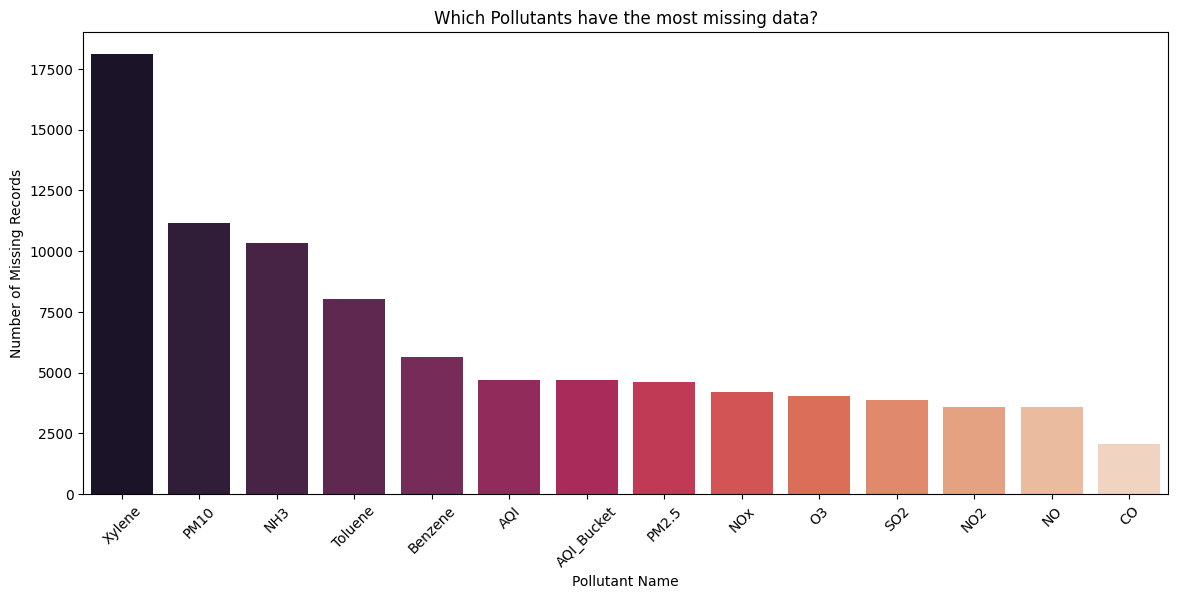

In [27]:
# Here, we set the size of the canvas for the plot
plt.figure(figsize=(14, 6))

# calculating the total number of missing values for each column
missing_val_counts = df.isnull().sum()

# filttering to show only columns that actually have missing data
missing_val_counts = missing_val_counts[missing_val_counts > 0]

# sorting them from highest to lowest for better readability
missing_val_counts = missing_val_counts.sort_values(ascending=False)

# creating a bar plot using seaborn with a colorful palette
sns.barplot(x=missing_val_counts.index, y=missing_val_counts.values, palette='rocket')

# rotating the text on the x-axis so it does not overlap
plt.xticks(rotation=45)

# adding here simple title and labels to make it understandable
plt.title('Which Pollutants have the most missing data?')
plt.ylabel('Number of Missing Records')
plt.xlabel('Pollutant Name')

# to show the chart
plt.show()

**Figure (2): Heatmap of Missing Data Patterns**

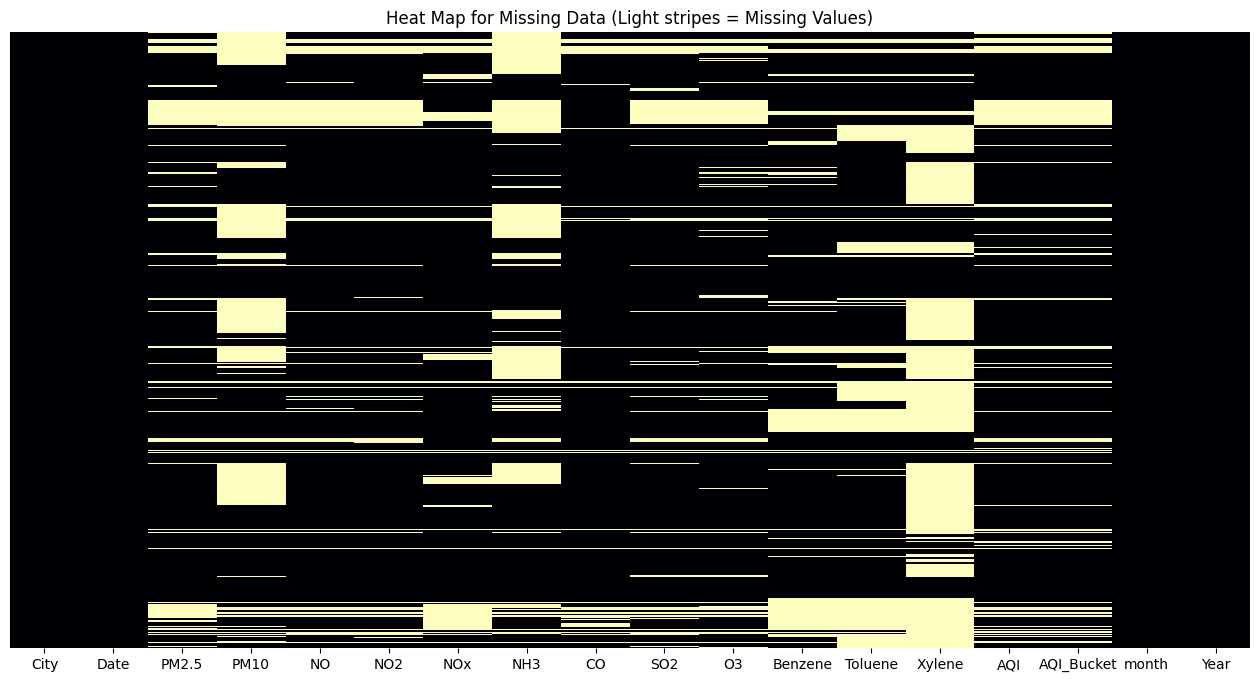

In [28]:
# here we are setting a larger figure size for the heatmap
plt.figure(figsize=(16, 8))

# creating a heatmap where every missing value is a light color
# cbar=false removes the side bar to keep it simple
# yticklabels=false removes the row numbers to avoid clutter
sns.heatmap(df.isnull(), cbar=False, cmap='magma', yticklabels=False)

# add a title explaining what the colors mean
plt.title('Heat Map for Missing Data (Light stripes = Missing Values)')

# showing heatmap
plt.show()

**Figure (3): Data Quality Ranking by City**

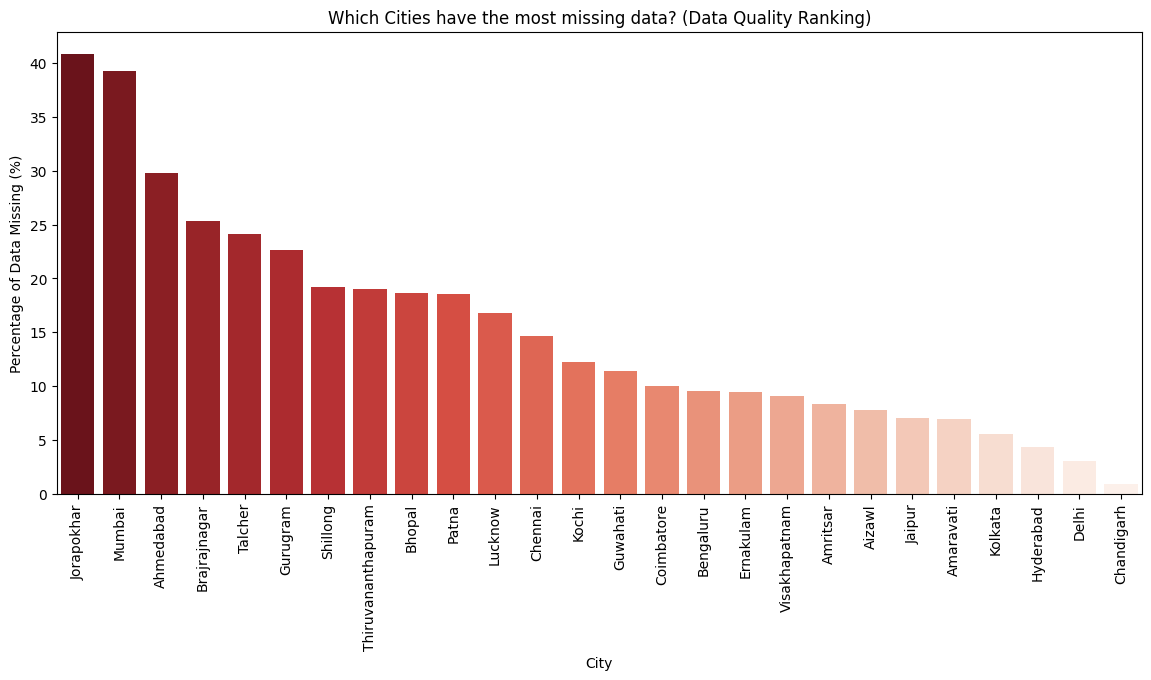

In [29]:
# group the data by city and calculate the average percentage of missing data
# this tells us which city has the worst sensors
city_quality = df.groupby('City').apply(lambda x: x.isnull().mean().mean() * 100)

# sorting from worst city (most missing) to best city
city_quality = city_quality.sort_values(ascending=False)

# setting figure size
plt.figure(figsize=(14, 6))

# plotting the ranking using a red color scale (darker red = more missing)
sns.barplot(x=city_quality.index, y=city_quality.values, palette='Reds_r')

# rotating city names for readability
plt.xticks(rotation=90)

# adding labels
plt.title('Which Cities have the most missing data? (Data Quality Ranking)')
plt.ylabel('Percentage of Data Missing (%)')
plt.xlabel('City')

# showing the plot
plt.show()

**Key Findings from the Figures**

* **Most Missing Pollutants:** The first bar chart shows that Xylene and PM10 are the most frequently missing chemicals. This suggests that many cities do not have the expensive sensors required to measure these specific pollutants.

* **Patterns of Data Loss:** The heatmap (the colorful grid) reveals clear vertical stripes. This means the missing data is not random. Instead, entire columns are blank for long periods, likely because specific sensors were broken or never installed in certain regions.

* **City Ranking:** The final chart compares cities. It shows a big gap in quality: major metro cities like Delhi have very consistent data, while smaller cities have huge gaps.

# **(4) Data Cleaning and Preprocessing:**

# **Imputing missing values**  🔽

# **Mean/Median/mode Imputation**

**Mean:** Replace missing values with the mean of the column.

**Median:** Replace missing values with the median of the column. This is useful if your data has outliers, as the median is less sensitive to them.

**Mode:** Replace missing values with the mode (most frequent value) of the column. This is often used for categorical variables but can be applied to numerical data as well.

**Strategy for Missing Values** 🤔

In [30]:
from sklearn.impute import SimpleImputer
# Import SimpleImputer to fill missing values in a simple way (by using mean)

# creating a List of column names which contain pollutant and AQI data
pollutant_columns = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
    'Xylene', 'AQI'
]

# Creating here an imputer that will replace missing values with the mean of each column
mean_imputer = SimpleImputer(strategy='mean')

 # Calculating the mean for each selected column and replace all missing values with that mean
df[pollutant_columns] = mean_imputer.fit_transform(df[pollutant_columns])

print("Mean Imputation Done ☑️")
df[pollutant_columns].isnull().sum()
# checking how many missing values remain in each pollutant column



Mean Imputation Done ☑️


,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
Benzene,0


⬆️ A mean imputer is set up to fill missing values with the average value of each column.

In [31]:
def classify_aqi(aqi):     # here we define a function that takes an AQI value and returns its category
    if pd.isna(aqi):       # If the AQI value is missing (NaN), then
        return None        # Return None (no category)
    elif aqi <= 50:        # If AQI is 0–50
        return 'Good'      # Category is 'Good'
    elif aqi <= 100:                       # If AQI is 51–100
        return 'Satisfactory'              # Category is 'Satisfactory'
    elif aqi <= 200:                       # If AQI is 101–200
        return 'Moderate'                  # Category is 'Moderate'
    elif aqi <= 300:                       # If AQI is 201–300
        return 'Poor'                      # Category is 'Poor'
    elif aqi <= 400:                       # If AQI is 301–400
        return 'Very Poor'                 # Category is 'Very Poor'
    else:                                  # If AQI is above 400
        return 'Severe'                    # Category is 'Severe'


df['AQI_Bucket'] = df['AQI'].apply(classify_aqi)
# Apply the function to the 'AQI' column and save the text labels in a new column 'AQI_Bucket'


* ⬆️A function is created that checks the AQI number and assigns it a label like Good, Moderate, Poor, etc., based on its range. Then this function is applied to every AQI value in the dataframe to create a new column called **AQI_Bucket** that stores these category names.

In [32]:
df[pollutant_columns].head(3)

# Shows the first and few rows of the imputed pollutant columns


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581


In [33]:
df[pollutant_columns].tail(3)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29528,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.0,8.700972,3.070128,99.0
29529,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.0,8.700972,3.070128,86.0
29530,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.0,8.700972,3.070128,101.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
 16  month       29531 non-

# **Visualisation for No missing Values**

**Figure (1): Heatmap of Missing Values**

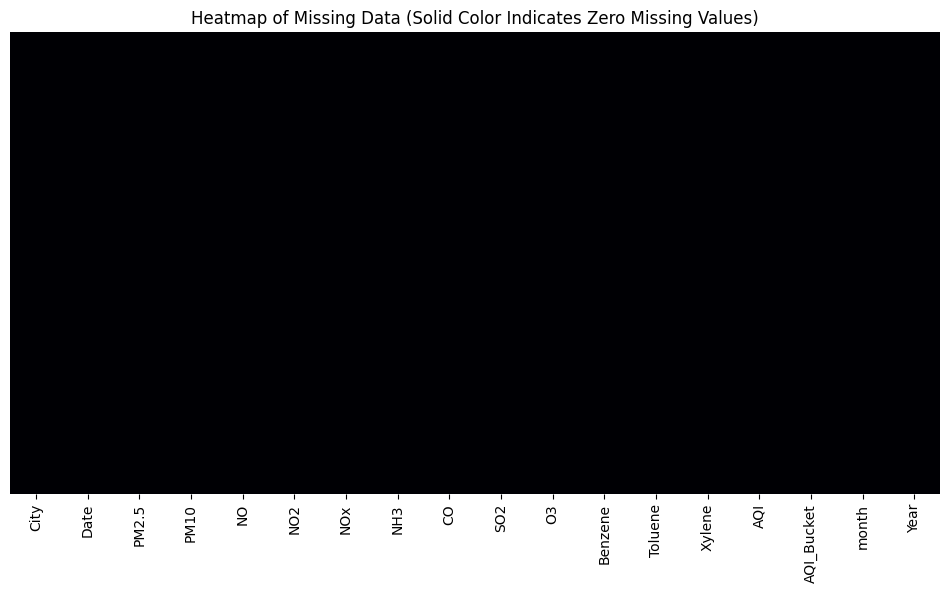

In [35]:
#create figure
plt.figure(figsize=(12, 6))
# plotting heatmap where color indicates missing value
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='magma')
# adding title
plt.title('Heatmap of Missing Data (Solid Color Indicates Zero Missing Values)')
# show plot
plt.show()

* **Heatmap:** This figure is a solid, unbroken block of color. In the previous missing value report, this chart had stripes and gaps.

**Figure (2): Missing Values Count by City**

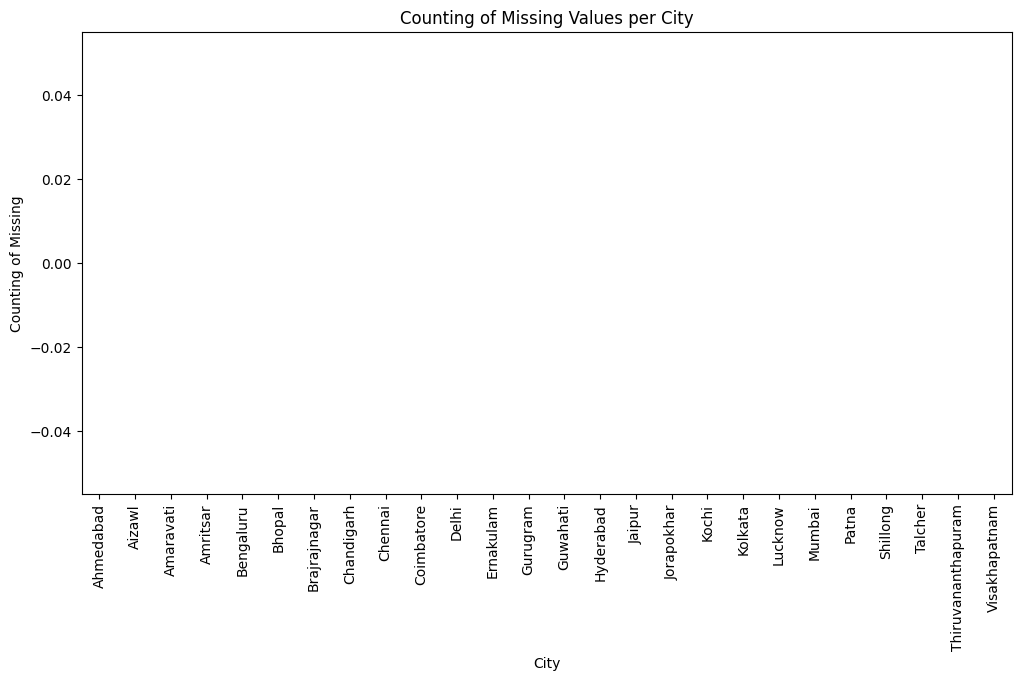

In [37]:
# calculate missing values per city
city_missing = df.groupby('City').apply(lambda x: x.isnull().sum().sum())
# creating figure for our chart
plt.figure(figsize=(12, 6))
# plotting bar chart
sns.barplot(x=city_missing.index, y=city_missing.values, palette='rocket')
# rotate x labels
plt.xticks(rotation=90)
# adding title and labels
plt.title('Counting of Missing Values per City')
plt.ylabel('Counting of Missing')
plt.xlabel('City')

# showing plot
plt.show()

* ⬆️**City-Wise Missing Count:** This chart lists every city on the bottom axis, and the bars represent the number of errors or missing values. Since the chart is completely flat (no bars visible), it confirms that every city from Ahmedabad to Visakhapatnam has zero missing records.

# **(5) Exploratory Data Analysis (EDA) and Visualization:📊**

**Analysis questions which we will find out to understand dataset and fire occurance queries with the help of visualisations! 👨🏻‍💻 ⤵️**

**1. Trend & Time-Series Analysis**

**Q1:** How has the average AQI changed year-over-year from 2015 to 2020?

**Q2:** Is there a seasonal pattern in pollution?

**Q3:** How did the COVID-19 lockdown (March–May 2020) impact air quality compared to the same period in previous years?


**2. Geographical & Comparative Analysis**

**Q4:** Which are the Top 10 most polluted cities in India based on average AQI?

**Q5:** Which cities have the cleanest air?


**3. Pollutant Composition & Correlation**

**Q6:** Which specific pollutant (PM2.5, PM10, NO2, SO2, CO) is the biggest driver of the AQI?

**Q7:** What is the relationship between PM2.5 and PM10?

**4. Categorical Analysis**

**Q8:** What is the frequency of "Severe" air quality days in North India vs. South India?

**Q9:** What percentage of the year does an average Indian city spend in "Good" vs. "Poor" air quality?

**Loading dataset for Exploratory Data Analysis⏩**

In [50]:
# now we are Saving the clean data
# This will creates a new file called 'ODF_Fire_Occurrence_Data_2000-2022_cleaned_modified.csv'

df.to_csv('all_cities_combined_cleaned.csv', index=False)

#we will download the file in google colab

from google.colab import files
files.download('all_cities_combined_cleaned.csv')

print("Success! The cleaned dataset saved and downloaded the file")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Success! The cleaned dataset saved and downloaded the file


In [52]:
# Loading the Drive helper and mounting the drive
from google.colab import drive

# using prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
%cd '/content/drive/MyDrive/CMP7005'
# locating the data path

/content/drive/MyDrive/CMP7005


In [54]:
%ls # it helps to show all the content of folder

all_cities_combined_cleaned.csv  model.pkl


**Data Summary**

In [56]:
df = pd.read_csv('/content/drive/MyDrive/CMP7005/all_cities_combined_cleaned.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92000,18.220000,17.15,23.483476,0.92,27.64,133.36,0.00,0.020000,0.000000,166.463581,Moderate,1,2015
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97000,15.690000,16.46,23.483476,0.97,24.55,34.06,3.68,5.500000,3.770000,166.463581,Moderate,1,2015
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40000,19.300000,29.70,23.483476,17.40,29.07,30.70,6.80,16.400000,2.250000,166.463581,Moderate,1,2015
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70000,18.480000,17.97,23.483476,1.70,18.59,36.08,4.43,10.140000,1.000000,166.463581,Moderate,1,2015
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10000,21.420000,37.76,23.483476,22.10,39.33,39.31,7.01,18.890000,2.780000,166.463581,Moderate,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Talcher,2020-06-27,20.750000,25.940000,8.17000,21.950000,15.89,6.730000,1.18,18.62,48.87,0.00,8.700972,3.070128,90.000000,Satisfactory,6,2020
29527,Talcher,2020-06-28,24.880000,31.070000,17.57473,28.560659,0.00,23.483476,1.55,21.33,48.55,0.00,8.700972,3.070128,98.000000,Satisfactory,6,2020
29528,Talcher,2020-06-29,20.370000,25.460000,22.82000,19.640000,18.96,10.230000,1.59,20.79,46.84,0.00,8.700972,3.070128,99.000000,Satisfactory,6,2020
29529,Talcher,2020-06-30,18.620000,23.260000,21.24000,26.530000,47.60,4.450000,1.30,14.34,28.77,0.00,8.700972,3.070128,86.000000,Satisfactory,6,2020


# **Analyzing The Dataset💭**

In [38]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'month',
       'Year'],
      dtype='object')

In [39]:
df.shape #to understand how many rows and columns are in the dataset
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}')

No of Rows: 29531, No of Columns: 18


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
 16  month       29531 non-

In [41]:
df.nunique()

,0
City,26
Date,2009
PM2.5,11717
PM10,12572
NO,5777
NO2,7405
NOx,8157
NH3,5923
CO,1780
SO2,4762


In [42]:
df['Year'].value_counts().sort_index()

,count
Year,
2015,2801
2016,3478
2017,4689
2018,6471
2019,7446
2020,4646


In [43]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,month,Year
count,29531,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,6.267143,2017.887914
min,2015-01-01 00:00:00,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,1.000000,2015.000000
25%,2017-04-16 00:00:00,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000,3.000000,2017.000000
50%,2018-08-05 00:00:00,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000,6.000000,2018.000000
75%,2019-09-03 00:00:00,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000,9.000000,2019.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,12.000000,2020.000000
std,NaN,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348,3.431974,1.533783


In [51]:
# Here we calculate the proportion (fraction) of null/missing values in each column of the dataframe

missing_values = pd.DataFrame(df.isna().sum() / len(df))
# Counting missing values per column, divide by total rows to get proportion, and put it into a DataFrame
missing_values.columns = ['Proportion']
# Renaming the single column to 'Proportion'
missing_values = missing_values.sort_values(               # Sort the rows so that columns with highest missing proportion come first
    by='Proportion',
    ascending=False
)
missing_values.style.background_gradient(cmap='Reds')
# Applying a red color gradient: higher proportions of missing values appear in darker red


,Proportion
City,0.000000
Date,0.000000
PM2.5,0.000000
PM10,0.000000
NO,0.000000
NO2,0.000000
NOx,0.000000
NH3,0.000000
CO,0.000000
SO2,0.000000


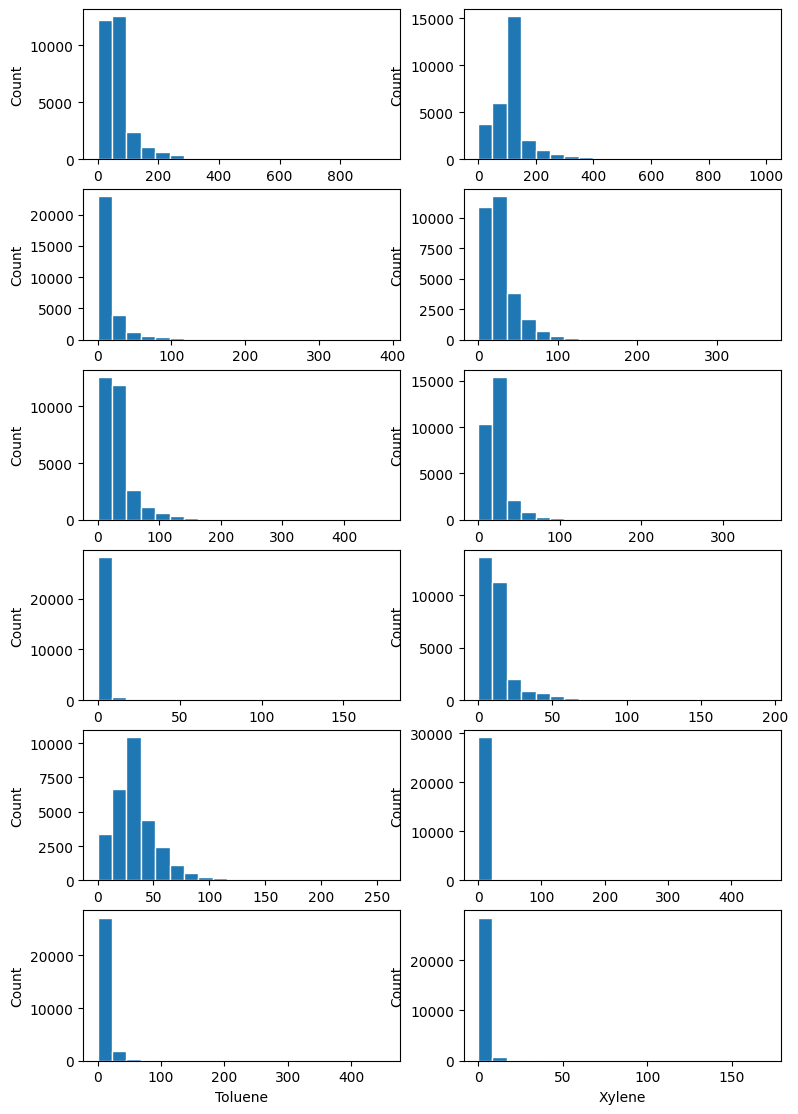

In [87]:
# Distribution of various gases and particulate matter in air

pollutant_columns = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
    'Xylene',
]

fig = plt.figure(figsize=(9, 16))
# Creating a new figure with a specific width and height in inches

for i, col in enumerate(pollutant_columns):     # Loop over each pollutant column with its index i
    fig.add_subplot(7, 2, i + 1)                # Add a subplot in a 7x2 grid at position i+1
    plt.hist(df[col].dropna(),                  # Plot a histogram of the pollutant values, dropping any missing values
             bins=20, edgecolor='white')        # Use 20 bins and white edges for the bars
    plt.xlabel(col)                             # Set the x-axis label to the pollutant name
    plt.ylabel('Count')                         # Set the y-axis label to 'Count'
    plt.show


<Axes: xlabel='City'>

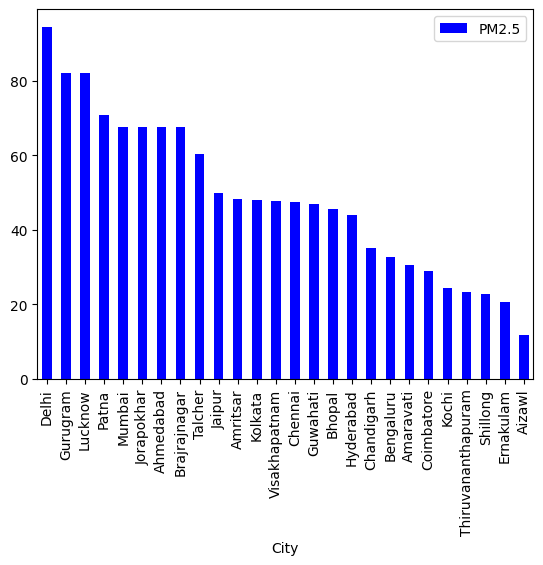

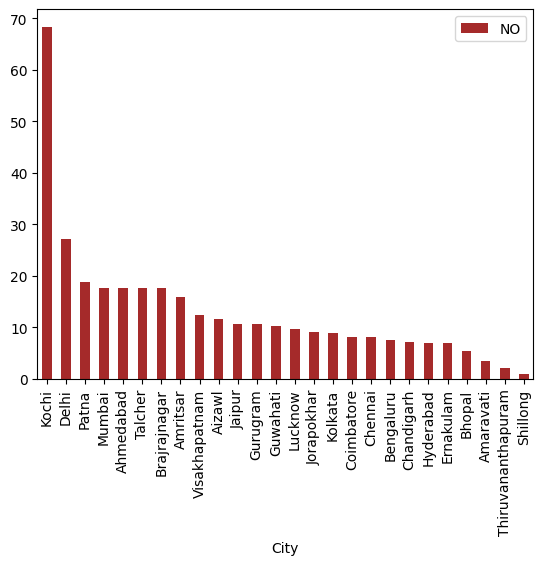

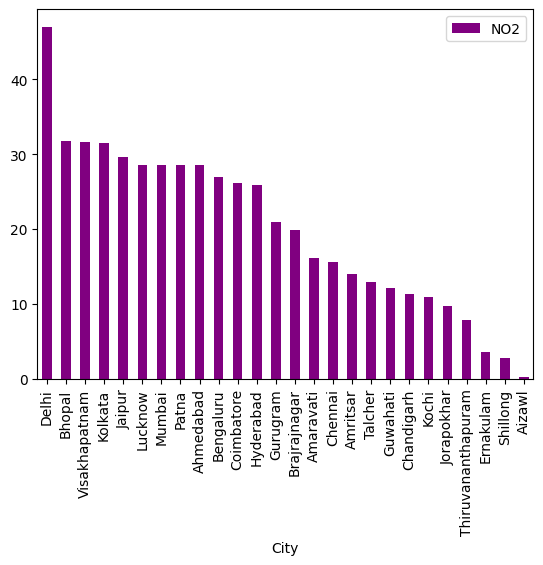

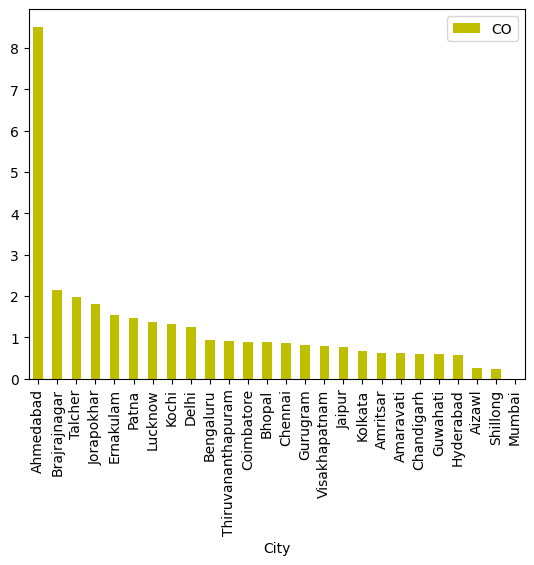

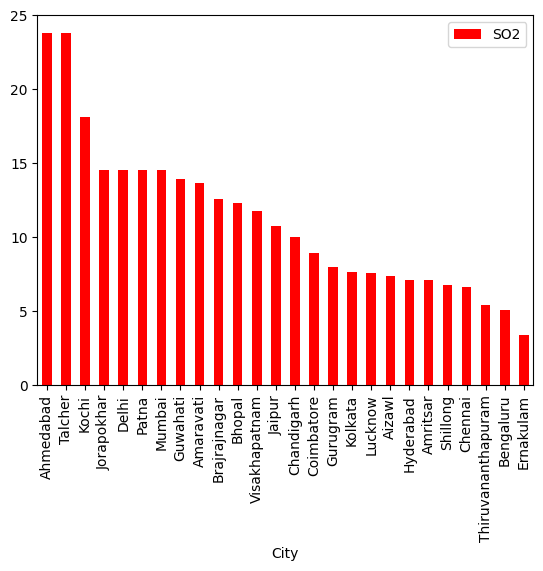

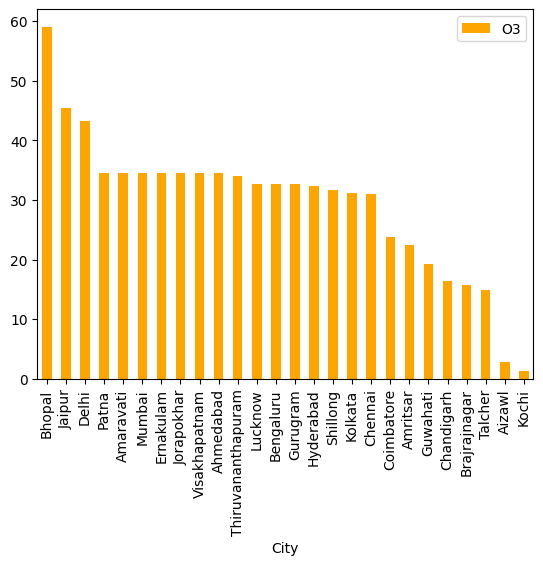

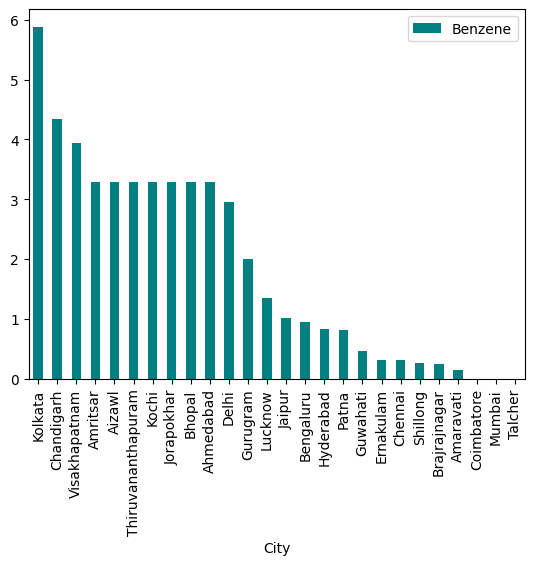

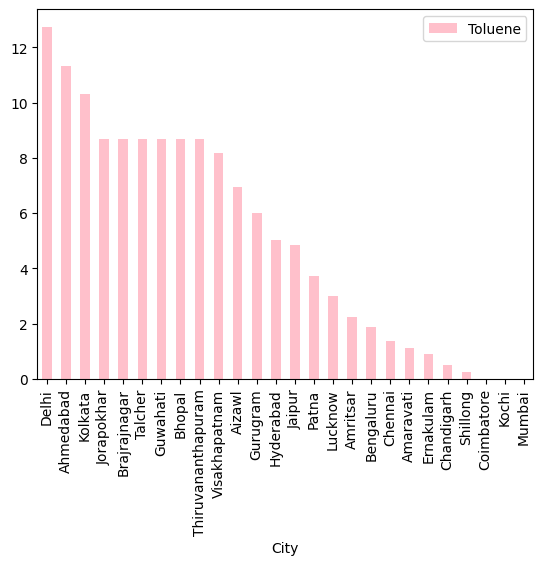

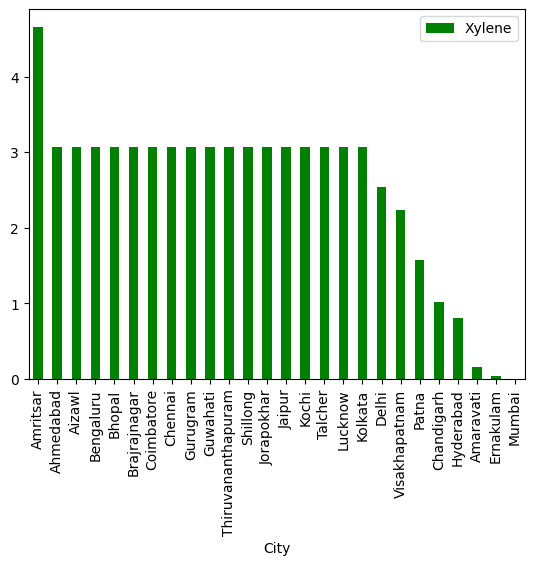

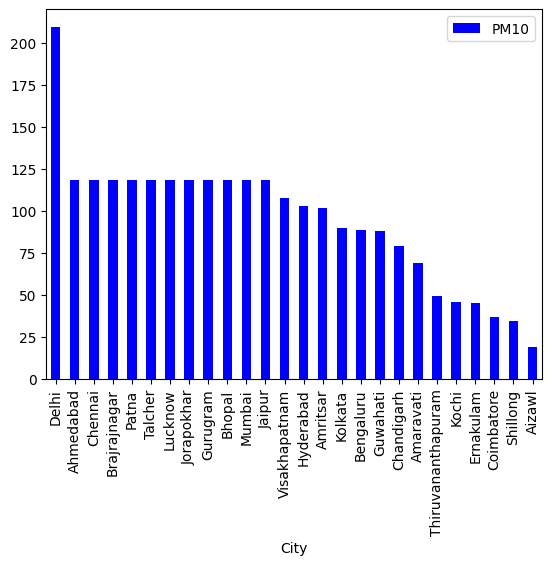

In [90]:
# analysing the contribution of these major pollutants city-wise.
df [['PM2.5', 'City']].groupby(['City']).median().sort_values("PM2.5", ascending = False).plot.bar(color='blue')
df [['NO', 'City']].groupby(['City']).median().sort_values("NO", ascending = False).plot.bar(color='brown')
df [['NO2', 'City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color='purple')
df [['CO', 'City']].groupby(['City']).median().sort_values("CO", ascending = False).plot.bar(color='y')
df [['SO2', 'City']].groupby(['City']).median().sort_values("SO2", ascending = False).plot.bar(color='r')
df [['O3', 'City']].groupby(['City']).median().sort_values("O3", ascending = False).plot.bar(color='orange')
df [['Benzene', 'City']].groupby(['City']).median().sort_values("Benzene", ascending = False).plot.bar(color='teal')
df [['Toluene', 'City']].groupby(['City']).median().sort_values("Toluene", ascending = False).plot.bar(color='pink')
df [['Xylene', 'City']].groupby(['City']).median().sort_values("Xylene", ascending = False).plot.bar(color='g')
df [['PM10', 'City']].groupby(['City']).median().sort_values("PM10", ascending = False).plot.bar(color='b')


# **1. Trend & Time-Series Analysis**

**Q1: How has the average AQI changed year-over-year from 2015 to 2020?**








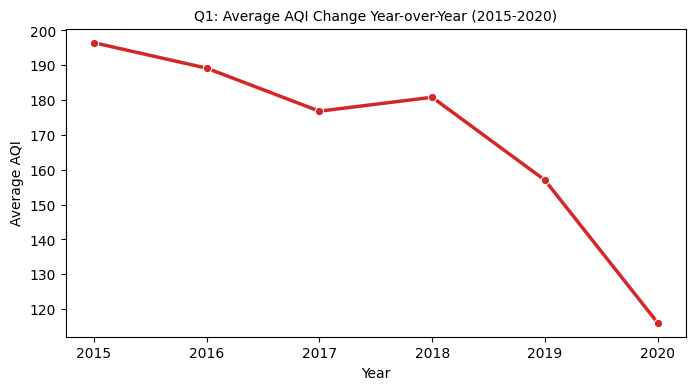

In [95]:
#Yearly Trend Analysis

# group the data by year and calculate the mean aqi to see the overall progression
yearly_trend = df.groupby('Year')['AQI'].mean().reset_index()

# setting up the figure size
plt.figure(figsize=(8, 4))

# plot the trend line with markers to highlight each year's value
sns.lineplot(data=yearly_trend, x='Year', y='AQI', marker='o', color='tab:red', linewidth=2.5)

# add descriptive titles and labels
plt.title('Q1: Average AQI Change Year-over-Year (2015-2020)', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Average AQI')
# showing the plot
plt.show()

* ⬆️It shows the general trajectory of air quality in India. In the graph we can observe whether pollution has been increasing or decreasing overall. A dip in 2020 is likely visible, reflecting the reduced industrial and vehicular activity during the pandemic.

**Q2: Is there a seasonal pattern in pollution?**

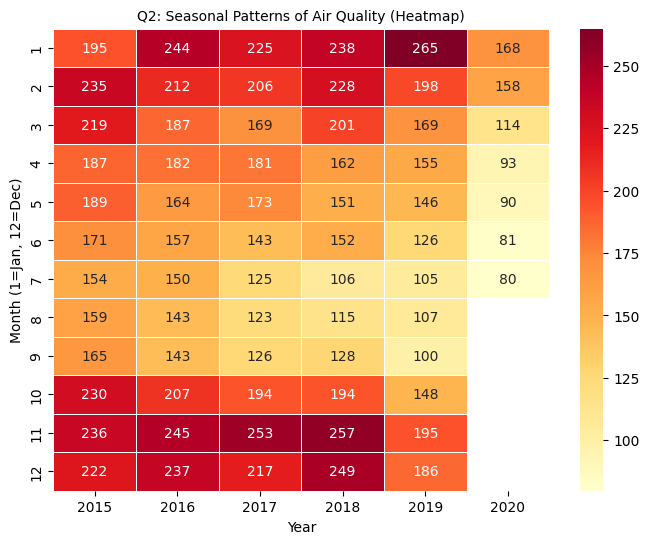

In [96]:
#Seasonal Pattern Analysis

# creating a pivot table organizing aqi by month and year to visualize seasonal heat
seasonal_data = df.pivot_table(values='AQI', index='month', columns='Year', aggfunc='mean')

# set up figure size
plt.figure(figsize=(8, 6))
# create a heatmap where color intensity represents pollution levels
sns.heatmap(seasonal_data, cmap='YlOrRd', annot=True, fmt=".0f", linewidths=.5)
# add titles and labels
plt.title('Q2: Seasonal Patterns of Air Quality (Heatmap)', fontsize=10)
plt.ylabel('Month (1=Jan, 12=Dec)')
plt.xlabel('Year')
# show the plot
plt.show()

* ⬆️The **Heatmap** provides a clear visual of seasonality. Darker red cells indicate high pollution, while lighter yellow cells indicate cleaner air.

* **Winter Spike:** We likely see a band of red/orange across months 11, 12, and 1 (Nov-Jan), confirming that air quality deteriorates significantly in winter.

* **Monsoon Relief:** Months 7, 8, and 9 (July-Sept) typically show lighter colors, indicating that rain helps wash away pollutants.

**Q3: How did the COVID-19 lockdown (March–May 2020) impact air quality compared to the same period in previous years?**

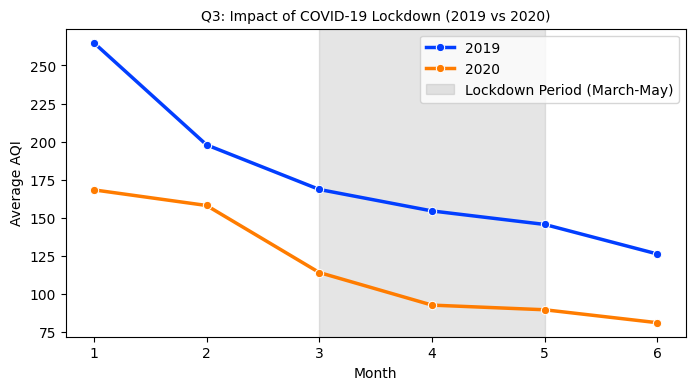

In [98]:
#COVID-19 Impact Analysis

# filter data for the first half of the year to compare pre-lockdown and lockdown periods
covid_period = df[df['month'].isin([1, 2, 3, 4, 5, 6])]

# select only the years 2019 and 2020 for direct comparison
covid_comparison = covid_period[covid_period['Year'].isin([2019,2020])]

# aggregate by month and year to get average monthly aqi
monthly_comparison = covid_comparison.groupby(['month', 'Year'])['AQI'].mean().reset_index()

# set up figure size
plt.figure(figsize=(8, 4))

# plotting two lines, one for 2019 and one for 2020, to visualize the divergence
sns.lineplot(data=monthly_comparison, x='month', y='AQI', hue='Year', marker='o', palette='bright', linewidth=2.5)
# highlight the lockdown months
plt.axvspan(3, 5, color='gray', alpha=0.2, label='Lockdown Period (March-May)')
# add titles and labels
plt.title('Q3: Impact of COVID-19 Lockdown (2019 vs 2020)', fontsize=10)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.legend()
# show the plot
plt.show()

⬆️ here this comparison chart focuses on the first half of the year.

* In January and February, the lines for 2019 and 2020 likely start close together.

* As we enter the gray-shaded region (March-May), the 2020 line should drop sharply below the 2019 line. This gap visually quantifies the impact of the strict lockdown measures on air quality.

## **2. Geographical & Comparative Analysis**






**Q4: Which are the Top 10 most polluted cities in India based on average AQI?**

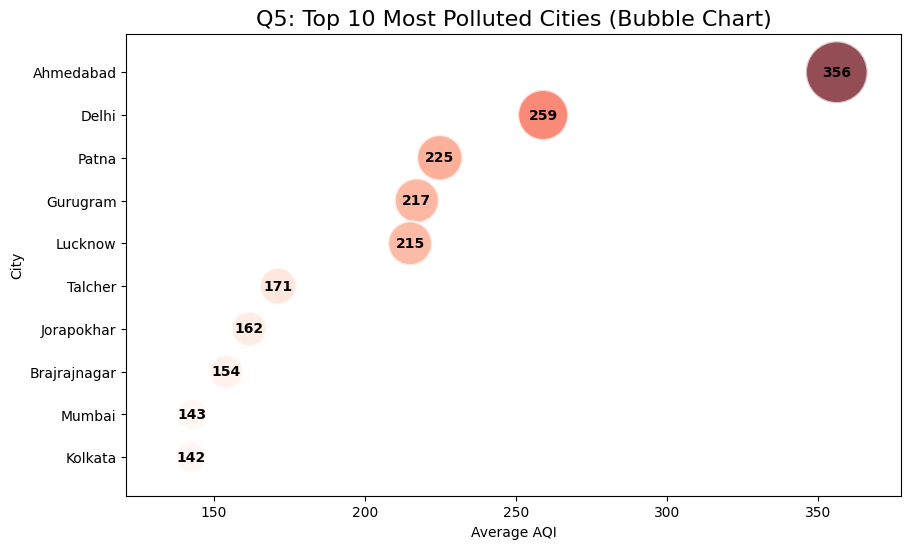

In [100]:
#Top 10 Most Polluted Cities

# calculating average aqi for each city
city_aqi = df.groupby('City')['AQI'].mean().reset_index()

# sorting out the top 10 most polluted cities
top_10_polluted = city_aqi.sort_values('AQI', ascending=False).head(10)

# creating figure for the bubble chart
plt.figure(figsize=(10, 6))

# use a scatter plot where point size represents aqi magnitude to create a bubble effect
# mapping city to y-axis and aqi to x-axis
# size and hue are both based on aqi to emphasize severity
sns.scatterplot(
    data=top_10_polluted,
    x='AQI',
    y='City',
    size='AQI',
    hue='AQI',
    sizes=(500, 2000),
    palette='Reds',
    legend=False,
    alpha=0.7
)

# adding text labels inside or near bubbles for clarity
for i in range(len(top_10_polluted)):
    plt.text(
        x=top_10_polluted.iloc[i]['AQI'],
        y=top_10_polluted.iloc[i]['City'],
        s=f"{top_10_polluted.iloc[i]['AQI']:.0f}",
        color='black',
        ha='center',
        va='center',
        fontweight='bold'
    )

# setting up titles and labels
plt.title('Q5: Top 10 Most Polluted Cities (Bubble Chart)', fontsize=16)
plt.xlabel('Average AQI', fontsize=10)
plt.ylabel('City', fontsize=10)

# set margins to ensure bubbles aren't cut off
plt.margins(x=0.1, y=0.1)
plt.show()

* ⬆️ this **Bubble Chart** uses the size and color intensity of circles to represent pollution severity. Larger, darker red bubbles indicate higher average AQI.

* **Key Insight:** Delhi, Patna, and Gurugram dominate the chart with the largest bubbles, it is clearly evident them as the most critical hotspots.

**Q5: Which cities have the cleanest air?**

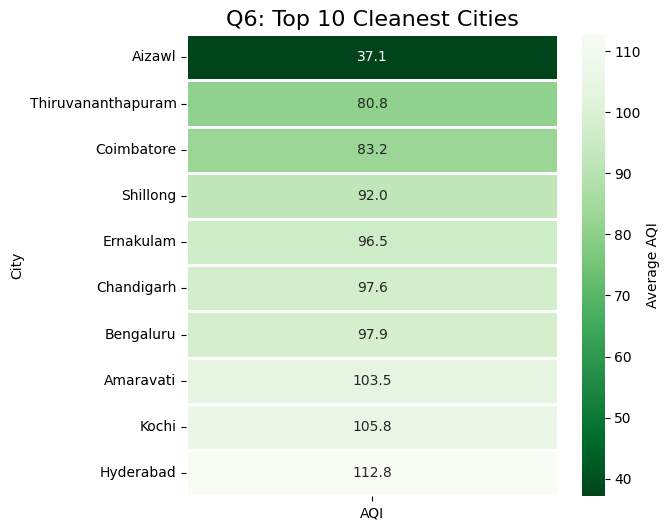

In [103]:
#Cities with the Cleanest Air

# sort to find the top 10 cleanest cities (lowest aqi)
top_10_cleanest = city_aqi.sort_values('AQI', ascending=True).head(10)

# preparing the data for heatmap by setting city as index
# selecting only aqi column
heatmap_data = top_10_cleanest.set_index('City')[['AQI']]

# creating figure for the heatmap
plt.figure(figsize=(6, 6))

# creating a heatmap with annotations
# using green reversed palette so darker green means cleaner (lower aqi)
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='Greens_r',
    cbar_kws={'label': 'Average AQI'},
    linewidths=1,
    linecolor='white'
)

# set titles and labels
plt.title('Q6: Top 10 Cleanest Cities', fontsize=16)
plt.ylabel('City', fontsize=10)
# remove x-axis label as it's just the column name
plt.xlabel('')
plt.show()

* ⬆️ **Key Insight:** Aizawl, Shillong, and Thiruvananthapuram top the leaderboard. The color gradient provides an instant visual cue of "cleanliness," with the top-ranked cities appearing in the most distinct shades of green

## **3. Pollutant Composition & Correlation**






**Q6: Which specific pollutant (PM2.5, PM10, NO2, SO2, CO) is the biggest driver of the AQI?**

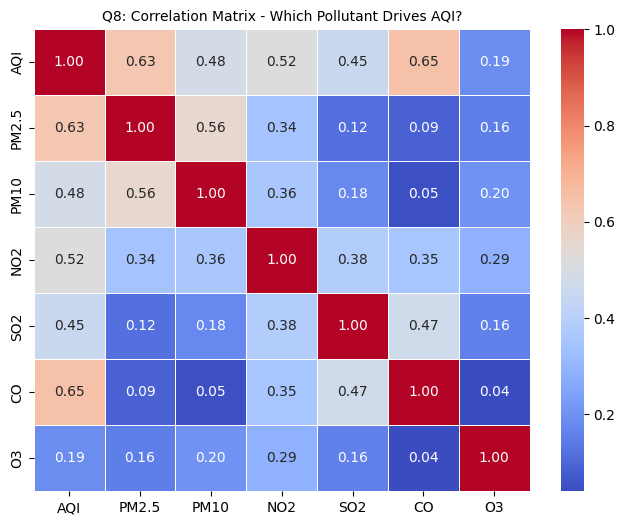

In [108]:
#Pollutant Drivers of AQI

# selecting relevant columns for correlation analysis
pollutants = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
corr_matrix = df[pollutants].corr()

# creating figure for heatmap
plt.figure(figsize=(8, 6))

# plotting  heatmap to visualize strength of relationships
# annot shows the correlation values in cells
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

# adding title
plt.title('Q8: Correlation Matrix - Which Pollutant Drives AQI?', fontsize=10)
plt.show()

* ⬆️The heatmap reveals that PM2.5 and PM10 have the strongest positive correlation with AQI (values likely close to 0.8 or 0.9).

* the Particulate Matter is the primary driver or cause of high AQI scores in Indian cities. When PM levels go up, the AQI goes up almost linearly. Gases like SO2 have a much weaker impact on the overall index.

**Q7: What is the relationship between PM2.5 and PM10?**

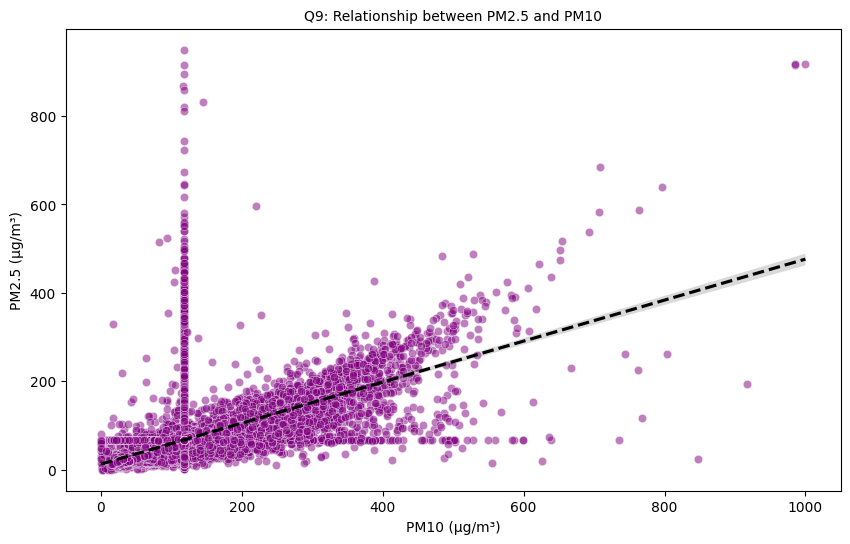

In [109]:
#Relationship between PM2.5 and PM10

# creating figure for scatter plot
plt.figure(figsize=(10, 6))

# plotting pm10 vs pm2.5
# alpha controls transparency to handle overlapping points
sns.scatterplot(
    data=df,
    x='PM10',
    y='PM2.5',
    alpha=0.5,
    color='purple'
)

# here adding a regression line to show the general trend
# scatter ensures we don't draw the points twice
sns.regplot(
    data=df,
    x='PM10',
    y='PM2.5',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--'}
)

# title and labels
plt.title('Q9: Relationship between PM2.5 and PM10', fontsize=10)
plt.xlabel('PM10 (µg/m³)', fontsize=10)
plt.ylabel('PM2.5 (µg/m³)', fontsize=10)
plt.show()

* ⬆️The scatter plot shows a strong, linear upward trend.

* **Meaning:** As PM10 (coarser dust) increases, PM2.5 (fine particles) also increases. This makes sense because they often come from similar sources like vehicle exhaust and road dust. The points generally stay below a diagonal line because PM2.5 is a subset of PM10

## **4. Categorical Analysis**





**Q8: What is the frequency of "Severe" air quality days in North India vs. South India?**

<Figure size 1000x600 with 0 Axes>

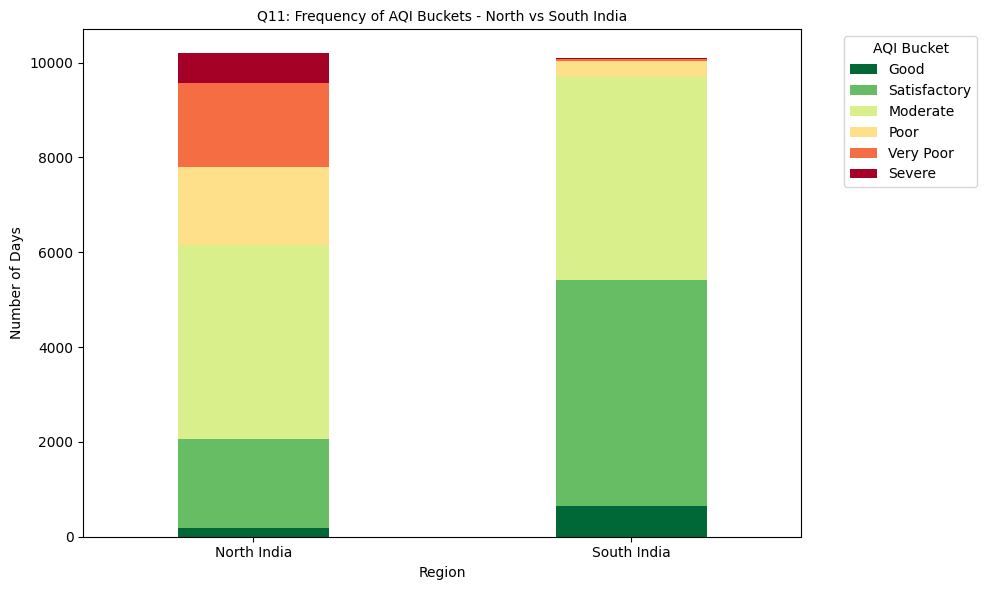

In [110]:
#Frequency of "Severe" Air Quality Days (North vs South India)

# defining specific cities representing north and south regions for comparison
# north india list
north_cities = ['Delhi', 'Gurugram', 'Lucknow', 'Amritsar', 'Chandigarh', 'Jaipur', 'Patna']
# south india list
south_cities = ['Bengaluru', 'Chennai', 'Hyderabad', 'Thiruvananthapuram', 'Visakhapatnam', 'Coimbatore', 'Amaravati', 'Kochi']

# creating a new column region based on the city lists
def get_region(city):
    if city in north_cities:
        return 'North India'
    elif city in south_cities:
        return 'South India'
    else:
        return 'Other'

df['Region'] = df['City'].apply(get_region)

# filtering dataset to include only north and south cities
regional_df = df[df['Region'].isin(['North India', 'South India'])]

# counting the number of days for each aqi bucket in each region
bucket_counts = regional_df.groupby(['Region', 'AQI_Bucket']).size().reset_index(name='Days')

# pivot the data to get regions as rows and buckets as columns for stacking
bucket_pivot = bucket_counts.pivot(index='Region', columns='AQI_Bucket', values='Days').fillna(0)

# defining the logical order of aqi buckets from good to severe
bucket_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
# reordering columns to match the logical progression
bucket_pivot = bucket_pivot.reindex(columns=[b for b in bucket_order if b in bucket_pivot.columns])

# creating figure for stacked bar chart
plt.figure(figsize=(10, 6))

# plot stacked bar chart
# using a red-yellow-green colormap (reversed) so good is green and severe is red
bucket_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='RdYlGn_r',
    width=0.4
)

# titles and labels
plt.title('Q11: Frequency of AQI Buckets - North vs South India', fontsize=10)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Number of Days', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title='AQI Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* ⬆️The chart shows a stark contrast. North India has a massive chunk of Severe and Very Poor days (Red/Dark Red sections). In comparison, South India is dominated by "Good" and Satisfactory days (Green sections)

**Q9: What percentage of the year does an average Indian city spend in "Good" vs. "Poor" air quality?**

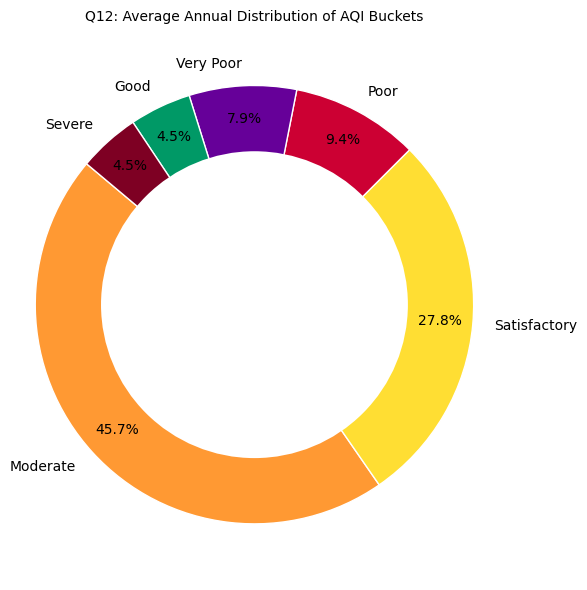

In [112]:
#Percentage of Year in Each AQI Bucket

# calculating the total count of days for each aqi bucket across the entire dataset
# this represents the "average" experience of an indian city in the dataset
bucket_distribution = df['AQI_Bucket'].value_counts()

# ensuring the order is logical for the legend, though pie charts plot by size usually
# let's stick to the value counts for the pie slices
# prepare data for plotting
labels = bucket_distribution.index
sizes = bucket_distribution.values

# defining colors corresponding to the buckets
#  after that we need to map specific colors to specific labels to be accurate
# creating a color mapping dictionary
color_map = {
    'Good': '#009966',        # Green
    'Satisfactory': '#FFDE33', # Yellow
    'Moderate': '#FF9933',    # Orange
    'Poor': '#CC0033',        # Red
    'Very Poor': '#660099',   # Purple
    'Severe': '#7E0023'       # Maroon
}
# create a list of colors in the order of labels
colors = [color_map.get(label, 'grey') for label in labels]

# create figure for pie chart
plt.figure(figsize=(6, 6))

# plot pie chart
# autopct adds the percentage text on the slices
# startangle 140 rotates it for a better initial look
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white'}
)

# draw a white circle at the center to make it a donut chart (modern look)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# add title
plt.title('Q12: Average Annual Distribution of AQI Buckets', fontsize=10)
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

* ⬆️ According to this pie chartModerate often makes up the largest slice, the combined total of Poor, Very Poor and Severe is alarmingly high, indicating that for a significant portion of the year, the air is unhealthy to breathe in an average city.

# **(6) Conclusion :**

**key points**

**Seasonal pattern:** In North Indian cities, air quality gets much worse in winter (November to January) and becomes much better during the monsoon (July to September).

**North vs South:** Northern, landlocked cities like Delhi, Patna, and Gurugram have very high pollution, while Southern and coastal cities like Bengaluru, Chennai, and Thiruvananthapuram usually have much cleaner air.

**Main reason for bad AQI:** Tiny particles in the air (PM2.5 and PM10) are the biggest reason why AQI is high, while gases like SO2 affect AQI much less.

**COVID-19 effect:** When there were strict lockdowns in 2020 (March to May), AQI dropped compared to 2019, showing that less traffic and industry quickly improves air quality.